<a href="https://colab.research.google.com/github/MichaelBittencourt/Trabalho1IA/blob/main/AplicacaoRNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

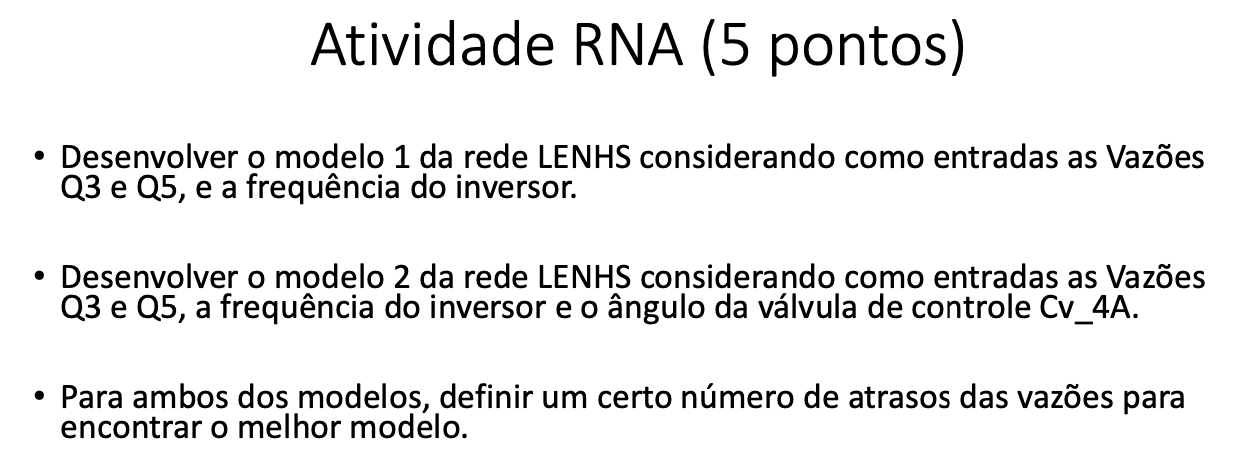

# Bibliotecas

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from math import floor 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


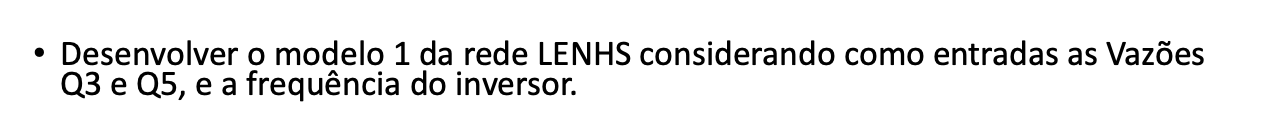
# Resposta

In [ ]:
# Parâmetros de entrada
qtd_treino = 3
qtd_previsao = 1
colunas_treino = 2*qtd_treino +1 # (Q3 e Q5)*número de atrasos + Frequência
colunas_predicao = 2 # Q3 e Q5 previstos
fator_treino = 0.72

In [ ]:
entrada = pd.read_csv('/content/drive/MyDrive/DESENVOLVIMENTO PESSOAL/MESTRADO/TÉCNICAS APLICADAS DE INTELIGÊNCIA ARTIFICIAL/Aplicação RNA/DadosLab/resultado_1.csv')
dados = pd.DataFrame()
dados['Tempo'] = entrada['Time']
dados['Frequencia'] = entrada['Untitled'].astype(float)
dados['FT_1A'] = entrada['Untitled 14']
dados['FT_3A'] = entrada['Untitled 17']

In [ ]:
for i in range(len(dados['FT_1A'])):
  dados['FT_1A'].iloc[i] = float(dados['FT_1A'].iloc[i].replace(',','.'))
  dados['FT_3A'].iloc[i] = float(dados['FT_3A'].iloc[i].replace(',','.'))
dados.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Tempo,Frequencia,FT_1A,FT_3A
0,22/09/2022 08:09:34.510,30.0,0.0,0.0
1,22/09/2022 08:09:49.187,30.0,0.0,0.0
2,22/09/2022 08:09:49.900,30.0,7.479637,2.794403
3,22/09/2022 08:09:56.013,30.0,7.548569,2.794403
4,22/09/2022 08:09:57.048,30.0,7.525592,2.804466


In [ ]:
dados.replace(0,0.000001,inplace=True)

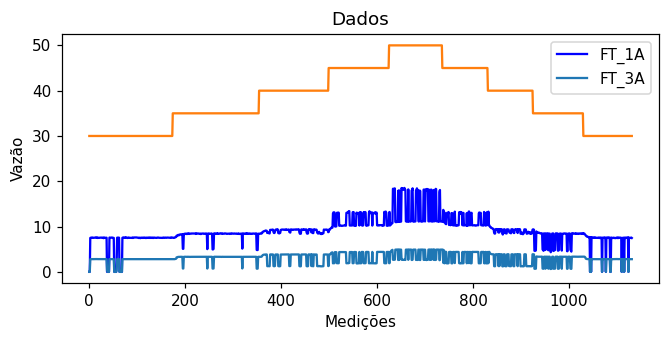

In [ ]:
plt.figure(figsize=(7,3),dpi=110)
plt.plot(dados['FT_1A'],'b')
plt.plot(dados['FT_3A'])
plt.plot(dados['Frequencia'])

plt.title('Dados')
plt.xlabel('Medições')
plt.ylabel('Vazão')
plt.legend(['FT_1A','FT_3A']) 
plt.show()

In [ ]:
data = pd.DataFrame()
data['Frequencia'] = entrada['Untitled'].astype(float)
for i in range(1,qtd_treino+qtd_previsao+1):
  data['FTA_1A['+ str(i - qtd_treino) +']'] = dados['FT_1A'].shift(qtd_treino - i)
  data['FTA_3A['+ str(i - qtd_treino) +']'] = dados['FT_3A'].shift(qtd_treino - i)
  

data.dropna(axis=0, inplace=True)
data.head()

,Frequencia,FTA_1A[-2],FTA_3A[-2],FTA_1A[-1],FTA_3A[-1],FTA_1A[0],FTA_3A[0],FTA_1A[1],FTA_3A[1]
2,30.0,0.000001,0.000001,0.000001,0.000001,7.479637,2.794403,7.548569,2.794403
3,30.0,0.000001,0.000001,7.479637,2.794403,7.548569,2.794403,7.525592,2.804466
4,30.0,7.479637,2.794403,7.548569,2.794403,7.525592,2.804466,7.571546,2.811174
5,30.0,7.548569,2.794403,7.525592,2.804466,7.571546,2.811174,7.502615,2.804466
6,30.0,7.525592,2.804466,7.571546,2.811174,7.502615,2.804466,7.548569,2.821237


In [ ]:
data_dim, len_data = data.shape 
data_treino_dim = floor(data_dim*fator_treino)

len_train = colunas_treino
data = np.array(data)

In [ ]:
data = tf.keras.utils.normalize(data,axis=1)

x_train = data[0:data_treino_dim,0:len_train]
y_train = data[0:data_treino_dim,len_train:len_data]

x_test = data[data_treino_dim:data_dim,0:len_train]
y_test = data[data_treino_dim:data_dim,len_train:len_data]

In [ ]:
print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)
print('x_test.shape:',x_test.shape)
print('y_test.shape:',y_test.shape)

x_train.shape: (812, 7)
y_train.shape: (812, 2)
x_test.shape: (317, 7)
y_test.shape: (317, 2)


In [ ]:
melhor_funcao = tf.nn.tanh

#TREINO DA REDE
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(colunas_treino))
model.add(tf.keras.layers.Dense(10,activation=melhor_funcao))
model.add(tf.keras.layers.Dense(17,activation=melhor_funcao))
model.add(tf.keras.layers.Dense(colunas_predicao,activation=melhor_funcao))


# Parâmetros de treinamento
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics = ['mean_squared_error'])

# Treinando 
model.fit(x_train,y_train,epochs=5000)
loss, mse = model.evaluate(x_test,y_test)

A saída de streaming foi truncada nas últimas 5000 linhas.
26/26 [==============================] - 0s 3ms/step - loss: 5.1417e-04 - mean_squared_error: 5.1417e-04
Epoch 471/5000
26/26 [==============================] - 0s 3ms/step - loss: 5.3741e-04 - mean_squared_error: 5.3741e-04
Epoch 472/5000
26/26 [==============================] - 0s 3ms/step - loss: 5.2776e-04 - mean_squared_error: 5.2776e-04
Epoch 473/5000
26/26 [==============================] - 0s 3ms/step - loss: 5.2354e-04 - mean_squared_error: 5.2354e-04
Epoch 474/5000
26/26 [==============================] - 0s 3ms/step - loss: 5.4854e-04 - mean_squared_error: 5.4854e-04
Epoch 475/5000
26/26 [==============================] - 0s 3ms/step - loss: 5.3388e-04 - mean_squared_error: 5.3388e-04
Epoch 476/5000
26/26 [==============================] - 0s 3ms/step - loss: 5.2288e-04 - mean_squared_error: 5.2288e-04
Epoch 477/5000
26/26 [==============================] - 0s 3ms/step - loss: 5.1831e-04 - mean_squared_error: 5.1831e

In [ ]:
val_loss, val_mse = model.evaluate(x_test,y_test)
y_pred = model.predict(x_test)

plt.figure(figsize=(7,3),dpi=110)
plt.plot(y_pred[:,0],lw=1,color='red')
plt.plot(y_test[:,0],lw=1,color='green')



plt.title('FTA_1A')
plt.xlabel('Medições')
plt.ylabel('Vazão')
plt.legend(['Vazão Estimada','Vazão Real']) 
plt.show()

In [ ]:
val_loss, val_mse = model.evaluate(x_test,y_test)
y_pred = model.predict(x_test)

plt.figure(figsize=(7,3),dpi=110)
plt.plot(y_pred[:,1],lw=1,color='red')
plt.plot(y_test[:,1],lw=1,color='green')



plt.title('FTA_3A')
plt.xlabel('Medições')
plt.ylabel('Vazão')
plt.legend(['Vazão Estimada','Vazão Real']) 
plt.show()

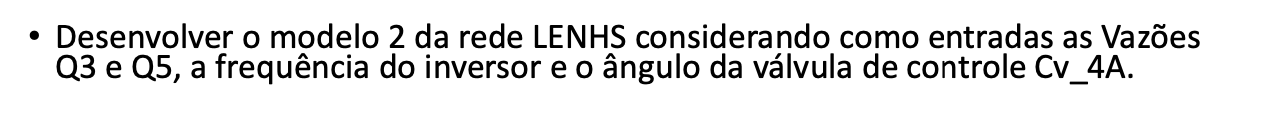
# Resposta

In [ ]:
# Parâmetros de entrada
qtd_treino = 3
qtd_previsao = 1
colunas_treino = qtd_treino*2+2
colunas_predicao = 2
fator_treino = 0.72

In [ ]:
arquivos = ['angulo30.csv','angulo35.csv','angulo40.csv','angulo45.csv','angulo50.csv']
tamanhos = list()

In [ ]:
for angulo in arquivos:
  if angulo == 'angulo30.csv':
    entrada = pd.read_csv('/content/drive/MyDrive/DESENVOLVIMENTO PESSOAL/MESTRADO/TÉCNICAS APLICADAS DE INTELIGÊNCIA ARTIFICIAL/Aplicação RNA/DadosLab/'+angulo)
    dados = pd.DataFrame()
    dados['Tempo'] = entrada['Time']
    #dados['Angulo'] = [float(angulo[6:-4])]*len(entrada['Time'])
    dados['Frequencia'] = entrada['Untitled'].astype(float)
    dados['Angulo'] = entrada['Untitled 1']
    dados['FT_1A'] = entrada['Untitled 14']
    dados['FT_3A'] = entrada['Untitled 17']
    
    tamanhos.append(len(entrada['Untitled 17']))
    
  else:
    entrada = pd.read_csv('/content/drive/MyDrive/DESENVOLVIMENTO PESSOAL/MESTRADO/TÉCNICAS APLICADAS DE INTELIGÊNCIA ARTIFICIAL/Aplicação RNA/DadosLab/'+angulo)
    dados2 = pd.DataFrame()
    dados2['Tempo'] = entrada['Time']
    #dados2['Angulo'] = [float(angulo[6:-4])]*len(entrada['Time'])
    dados2['Frequencia'] = entrada['Untitled'].astype(float)
    dados2['Angulo'] = entrada['Untitled 1']
    dados2['FT_1A'] = entrada['Untitled 14']
    dados2['FT_3A'] = entrada['Untitled 17']
    dados = pd.concat([dados,dados2],ignore_index=True)


dados.head()

,Tempo,Frequencia,Angulo,FT_1A,FT_3A
0,29/09/2022 10:00:52.819,30.0,0,"7,020095","2,53613"
1,29/09/2022 10:00:53.110,30.0,0,"7,020095","2,53613"
2,29/09/2022 10:00:53.533,30.0,"0,116794","7,112004","2,539484"
3,29/09/2022 10:00:54.002,30.0,"0,116794","7,112004","2,539484"
4,29/09/2022 10:00:54.398,30.0,"1,930534","7,06605","2,539484"


In [ ]:
for i in range(len(dados['FT_1A'])):
  dados['FT_1A'].iloc[i] = float(dados['FT_1A'].iloc[i].replace(',','.'))
  dados['FT_3A'].iloc[i] = float(dados['FT_3A'].iloc[i].replace(',','.'))
  dados['Angulo'].iloc[i] = float(dados['Angulo'].iloc[i].replace(',','.'))
dados.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Tempo,Frequencia,Angulo,FT_1A,FT_3A
0,29/09/2022 10:00:52.819,30.0,0.0,7.020095,2.53613
1,29/09/2022 10:00:53.110,30.0,0.0,7.020095,2.53613
2,29/09/2022 10:00:53.533,30.0,0.116794,7.112004,2.539484
3,29/09/2022 10:00:54.002,30.0,0.116794,7.112004,2.539484
4,29/09/2022 10:00:54.398,30.0,1.930534,7.06605,2.539484


In [ ]:
dados.replace(0,0.000001,inplace=True)

In [ ]:
for i in range(5082,5091):
  dados.drop(index=i,inplace=True)

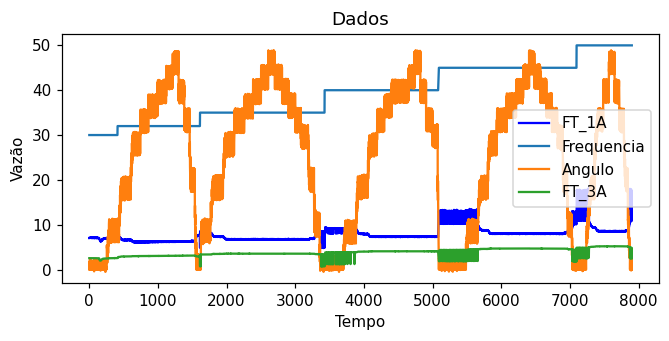

In [ ]:
plt.figure(figsize=(7,3),dpi=110)
plt.plot(dados['FT_1A'],'b')
plt.plot(dados['Frequencia'])
plt.plot(dados['Angulo'])
plt.plot(dados['FT_3A'])


plt.title('Dados')
plt.xlabel('Tempo')
plt.ylabel('Vazão')
plt.legend(['FT_1A','Frequencia','Angulo','FT_3A']) 
plt.show()

In [ ]:
data = pd.DataFrame()
data['Frequencia'] = dados['Frequencia']
data['Angulo'] = dados['Angulo']
for i in range(1,qtd_treino+qtd_previsao+1):
  data['FTA_1A['+ str(i - qtd_treino) +']'] = dados['FT_1A'].shift(qtd_treino - i)
  data['FTA_3A['+ str(i - qtd_treino) +']'] = dados['FT_3A'].shift(qtd_treino - i)
  

data.dropna(axis=0, inplace=True)
data.head()

,Frequencia,Angulo,FTA_1A[-2],FTA_3A[-2],FTA_1A[-1],FTA_3A[-1],FTA_1A[0],FTA_3A[0],FTA_1A[1],FTA_3A[1]
2,30.0,0.116794,7.020095,2.536130,7.020095,2.536130,7.112004,2.539484,7.112004,2.539484
3,30.0,0.116794,7.020095,2.536130,7.112004,2.539484,7.112004,2.539484,7.066050,2.539484
4,30.0,1.930534,7.112004,2.539484,7.112004,2.539484,7.066050,2.539484,7.066050,2.539484
5,30.0,1.930534,7.112004,2.539484,7.066050,2.539484,7.066050,2.539484,7.066050,2.539484
6,30.0,1.930534,7.066050,2.539484,7.066050,2.539484,7.066050,2.539484,7.066050,2.546193


In [ ]:
data_dim, len_data = data.shape 
data_treino_dim = floor(data_dim*fator_treino)

len_train = colunas_treino
data = np.array(data)


In [ ]:
data = tf.keras.utils.normalize(data,axis=1)

x_train = data[0:data_treino_dim,0:len_train]
y_train = data[0:data_treino_dim,len_train:len_data]

x_test = data[data_treino_dim:data_dim,0:len_train]
y_test = data[data_treino_dim:data_dim,len_train:len_data]

In [ ]:
x_test.shape

(2210, 8)

In [ ]:
funcoes = [tf.nn.relu, tf.nn.sigmoid, tf.nn.tanh, tf.nn.softmax]
val_loss = dict()
val_mse = dict()

for funcao in funcoes:

  # Criando Rede
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Input(colunas_treino))

  for i in [20,20,colunas_predicao]:
    model.add(tf.keras.layers.Dense(i,activation=funcao))

  # Parâmetros de treinamento
  model.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics = ['mean_squared_error'])

  # Treinando 
  model.fit(x_train,y_train,epochs=500)
  val_loss[funcao], val_mse[funcao] = model.evaluate(x_test,y_test)

melhor_funcao = list(val_mse.keys()) [list(val_mse.values()).index(min(val_mse.values()))]
print(melhor_funcao)

In [ ]:
melhor_funcao = tf.nn.tanh

#TREINO DA REDE
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(colunas_treino))
model.add(tf.keras.layers.Dense(10,activation=melhor_funcao))
model.add(tf.keras.layers.Dense(17,activation=melhor_funcao))
model.add(tf.keras.layers.Dense(colunas_predicao,activation=melhor_funcao))


# Parâmetros de treinamento
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics = ['mean_squared_error'])

# Treinando 
model.fit(x_train,y_train,epochs=1000)
loss, mse = model.evaluate(x_test,y_test)

Epoch 1/1000
178/178 [==============================] - 1s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 2/1000
178/178 [==============================] - 0s 2ms/step - loss: 1.5149e-04 - mean_squared_error: 1.5149e-04
Epoch 3/1000
178/178 [==============================] - 0s 2ms/step - loss: 1.3216e-04 - mean_squared_error: 1.3216e-04
Epoch 4/1000
178/178 [==============================] - 0s 2ms/step - loss: 1.1785e-04 - mean_squared_error: 1.1785e-04
Epoch 5/1000
178/178 [==============================] - 0s 2ms/step - loss: 1.0821e-04 - mean_squared_error: 1.0821e-04
Epoch 6/1000
178/178 [==============================] - 0s 2ms/step - loss: 9.9278e-05 - mean_squared_error: 9.9278e-05
Epoch 7/1000
178/178 [==============================] - 0s 2ms/step - loss: 9.2544e-05 - mean_squared_error: 9.2544e-05
Epoch 8/1000
178/178 [==============================] - 0s 2ms/step - loss: 8.8929e-05 - mean_squared_error: 8.8929e-05
Epoch 9/1000
178/178 [==========================

70/70 [==============================] - 0s 2ms/step - loss: 9.3544e-05 - mean_squared_error: 9.3544e-05


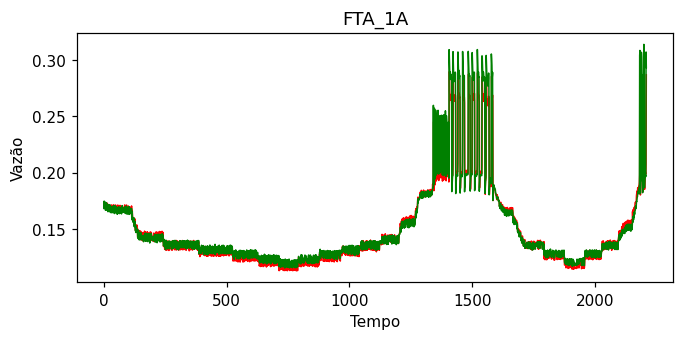

In [ ]:
val_loss, val_mse = model.evaluate(x_test,y_test)
y_pred = model.predict(x_test)

plt.figure(figsize=(7,3),dpi=110)
plt.plot(y_pred[:,0],lw=1,color='red')
plt.plot(y_test[:,0],lw=1,color='green')



plt.title('FTA_1A')
plt.xlabel('Medições')
plt.ylabel('Vazão')
#plt.legend(['Vazão Estimada','Vazão Real']) 
plt.show()

In [ ]:
y_test.shape

(2210, 2)

In [ ]:
maximo_FT3A = max(dados['FT_3A'])
maximo_FT3A

5.212781

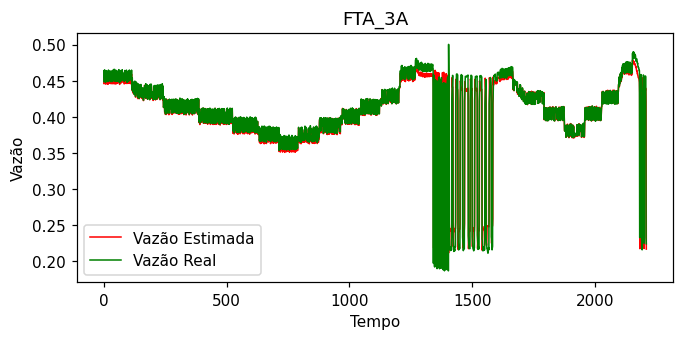

In [ ]:
plt.figure(figsize=(7,3),dpi=110)

plt.plot(y_pred[:,1]*maximo_FT3A,lw=1,color='red')
plt.plot(y_test[:,1]*maximo_FT3A,lw=1,color='green')

plt.title('FTA_3A')
plt.xlabel('Tempo')
plt.ylabel('Vazão')
plt.legend(['Vazão Estimada','Vazão Real']) 
plt.show()